# Elaborated plot with custom color palette
This jupyter notebook shows how to download data from GOES-16 and make a elaborated plot using the **GOES** package. Also, we learn how to create a custom color palette with the **custom_color_palette** package.

Import the packages.

In [1]:
import numpy as np
import GOES as GOES
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter

Downloads the file.

In [2]:
flist = GOES.download('goes16', 'ABI-L2-CMIPF',
                      DateTimeIni = '20200320-203000', DateTimeFin = '20200320-204000', 
                      channel = ['13'], path_out='/home/joao/Downloads/')

Files:
  OR_ABI-L2-CMIPF-M6C13_G16_s20200802030177_e20200802039497_c20200802039590.nc 100% 27.0MB 20s


Set the path and name of file that we will use. In this case that information is in flist.

In [3]:
file = flist[0]
print(file)

/home/joao/Downloads/OR_ABI-L2-CMIPF-M6C13_G16_s20200802030177_e20200802039497_c20200802039590.nc


Gets data from file.

In [4]:
# set the map domain
domain = [-90.0,-60.0,-21.0,2.0]

# reads the file
ds = GOES.open_dataset(file)

# get image with the coordinates of corners of their pixels
CMI, LonCor, LatCor = ds.image('CMI', lonlat='corner', domain=domain)

# get information about data
sat = ds.attribute('platform_ID')
band = ds.variable('band_id').data[0]
wl = ds.variable('band_wavelength').data[0]

Creates a custom color palette using the [custom_color_palette](https://github.com/joaohenry23/custom_color_palette) package.

In [5]:
# import package
import custom_color_palette as ccp

# set the colors of the custom palette
lower_colors = ['maroon','red','darkorange','#ffff00','forestgreen','cyan','royalblue',(148/255,0/255,211/255)]
lower_palette = [lower_colors, ccp.range(180.0,240.0,1.0)]

upper_colors = plt.cm.Greys
upper_palette = [upper_colors, ccp.range(240.0,330.0,1.0), [ccp.range(180.0,330.0,1.0),240.0,330.0]]

# pass parameters to the creates_palette module
cmap, cmticks, norm, bounds = ccp.creates_palette([lower_palette, upper_palette], extend='both')

# creating colorbar labels
ticks = ccp.range(180,330,10)

Creates plot.

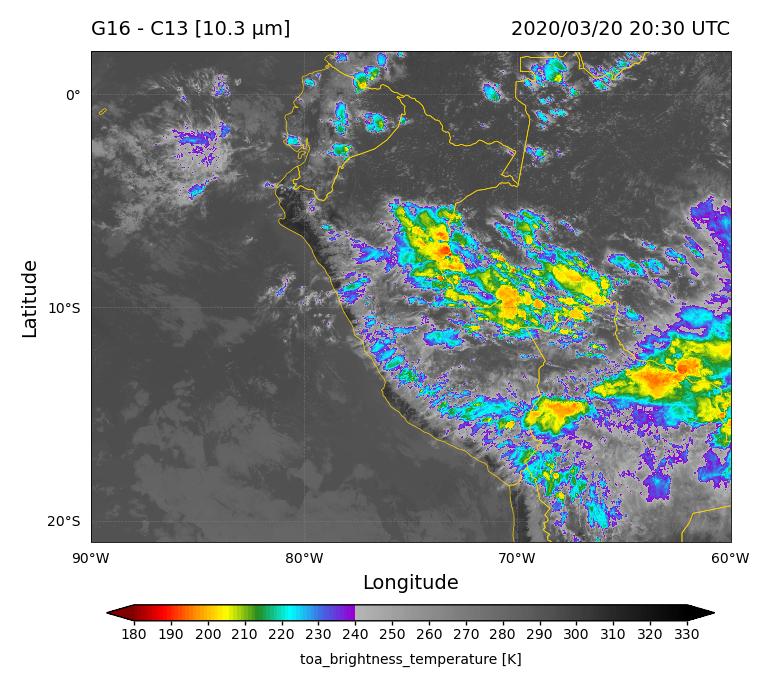

In [6]:
# calculates the central longitude of the plot
lon_cen = 360.0+(domain[0]+domain[1])/2.0

# creates the figure
fig = plt.figure('map', figsize=(4,4), dpi=200)
ax = fig.add_axes([0.1, 0.16, 0.80, 0.75], projection=ccrs.PlateCarree(lon_cen))
ax.outline_patch.set_linewidth(0.3)

# add the geographic boundaries
l = NaturalEarthFeature(category='cultural', name='admin_0_countries', scale='50m', facecolor='none')
ax.add_feature(l, edgecolor='gold', linewidth=0.25)

# plot the data
img = ax.pcolormesh(LonCor.data, LatCor.data, CMI.data, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())

# add the colorbar
cb = plt.colorbar(img, ticks=ticks, orientation='horizontal', extend='both',
                  cax=fig.add_axes([0.12, 0.13, 0.76, 0.02]))
cb.ax.tick_params(labelsize=5, labelcolor='black', width=0.5, length=1.5, direction='out', pad=1.0)
cb.set_label(label='{} [{}]'.format(CMI.standard_name, CMI.units), size=5, color='black', weight='normal')
cb.outline.set_linewidth(0.5)

# set the title
ax.set_title('{} - C{:02d} [{:.1f} μm]'.format(sat,band, wl), fontsize=7, loc='left')
ax.set_title(CMI.time_bounds.data[0].strftime('%Y/%m/%d %H:%M UTC'), fontsize=7, loc='right')

# Sets X axis characteristics
xticks = np.arange(-90, -50, 10)
ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter(dateline_direction_label=True))
ax.set_xlabel('Longitude', color='black', fontsize=7, labelpad=3.0)

# Sets Y axis characteristics
yticks = np.arange(-20, 10, 10)
ax.set_yticks(yticks, crs=ccrs.PlateCarree())
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.set_ylabel('Latitude', color='black', fontsize=7, labelpad=3.0)

# Sets tick characteristics
ax.tick_params(left=True, right=True, bottom=True, top=True,
               labelleft=True, labelright=False, labelbottom=True, labeltop=False,
               length=0.0, width=0.05, labelsize=5.0, labelcolor='black')

# Sets grid characteristics
ax.gridlines(xlocs=xticks, ylocs=yticks, alpha=0.6, color='gray',
             draw_labels=False, linewidth=0.25, linestyle='--')

# set the map limits
ax.set_extent([domain[0]+360.0, domain[1]+360.0, domain[2], domain[3]], crs=ccrs.PlateCarree())

plt.show()